
# Random Sample Imputation
Aim: Random sample imputation consists of taking random observation from the dataset and
we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [5]:
df['Age'].isnull().sum()

177

In [6]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=101)

853    16.00
540    36.00
259    50.00
690    31.00
469     0.75
       ...  
385    18.00
769    32.00
341    24.00
645    48.00
75     25.00
Name: Age, Length: 177, dtype: float64

In [7]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [8]:
def inputation(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_random'] = df[variable]
    # it will have random sample to fill na
    random_sampling = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=101)
    # random must have same index inorder to merge dataset
    random_sampling.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sampling


In [9]:
median = df['Age'].median()

In [10]:
inputation(df,'Age',median)

In [11]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [12]:
df['Age_random'].isnull().sum()

0

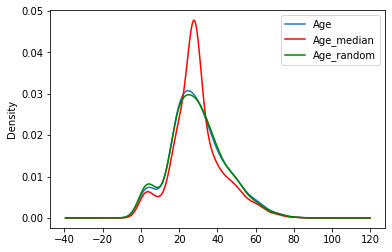

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df['Age_median'].plot(kind='kde',ax=ax,color='red')
df['Age_random'].plot(kind='kde',ax=ax,color='green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# Advantages
Easy To implement
There is less distortion in variance
# Disadvantage
Every situation randomness wont work


# Capturing NAN values with a new feature
It works well if the data are not missing completely at random

In [14]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
df['Age_Nan'] = np.where(df['Age'].isnull(),1,0)

In [16]:
df.head()

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [17]:
median = df['Age'].median()

In [18]:
df['Age'].fillna(median,inplace=True)

In [19]:
df.head(30)

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [20]:
df['Age_Nan'].value_counts()

0    714
1    177
Name: Age_Nan, dtype: int64

# Advantages
Easy to implement
Captures the importance of missing values
# Disadvantages
Creating Additional Features(Curse of Dimensionality)

# End of Distribution imputation

If there is suspicion that the missing value is not at random then capturing that information is important. In this scenario, one would want to replace missing data with values that are at the tails of the distribution of the variable.


In [21]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


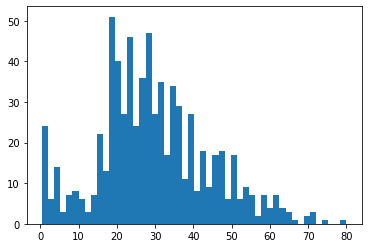

In [22]:
plt.hist(df['Age'],bins=50)
plt.show()

In [23]:
df['Age'].mean()+3*df['Age'].std()

73.27860964406095

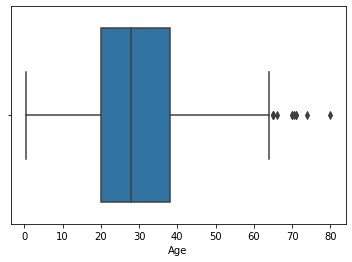

In [24]:
sns.boxplot(df['Age'])

In [25]:
extreme = df['Age'].mean()+3*df['Age'].std()

def inputer(df,variable,extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable] = df[variable].fillna(median)

In [26]:
inputer(df,'Age',extreme)

In [27]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


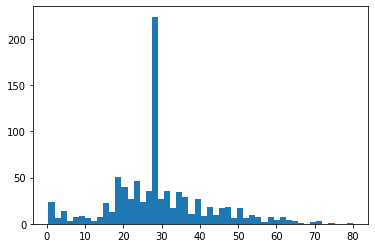

In [28]:
plt.hist(df['Age'],bins=50)
plt.show()

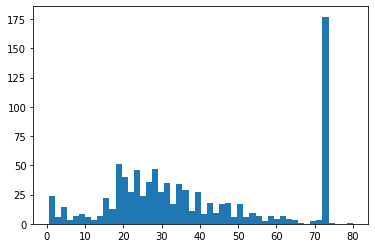

In [29]:
plt.hist(df['Age_end_distribution'],bins=50)
plt.show()

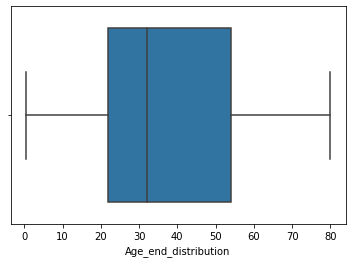

In [30]:
sns.boxplot(df['Age_end_distribution'])

# Arbitrary value imputation

###### it consist of replacing NaN value by arbitrary value

In [31]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])

df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [32]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

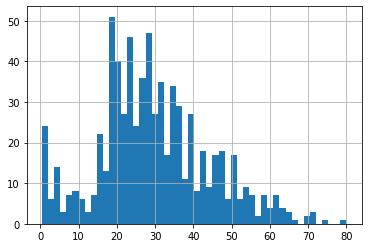

In [33]:

df['Age'].hist(bins=50)

### Advantages
Easy to implement.

Captures the importance of missingess if there is one

### Disadvantages
Distorts the original distribution of the variable

If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution

Hard to decide which value to use